# Install required libraries

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

# Set plot style
plt.style.use('seaborn-v0_8-dark')

## Load Data

In [4]:
# Assuming CSV is in Data/ directory as per previous setup
data_path = '../Data/retail_sales_dataset.csv'
df = pd.read_csv(data_path)

print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

First 5 Rows:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3   

## Exploratory Data Analysis (EDA)

### Summary statistics

In [5]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


### Check for missing values

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


### Visualizations

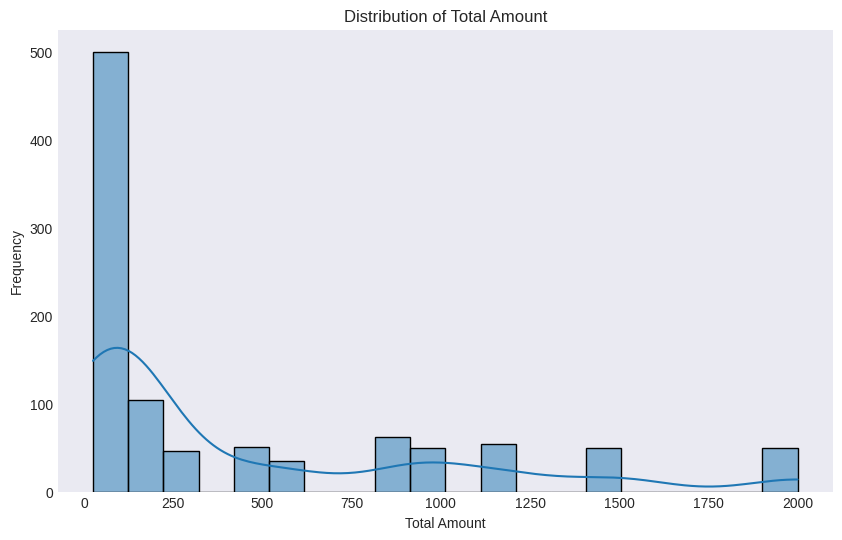

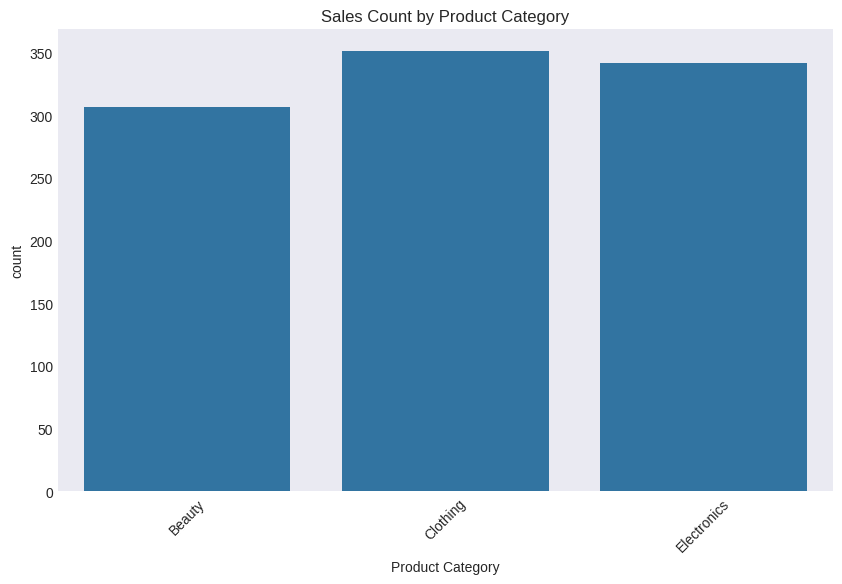

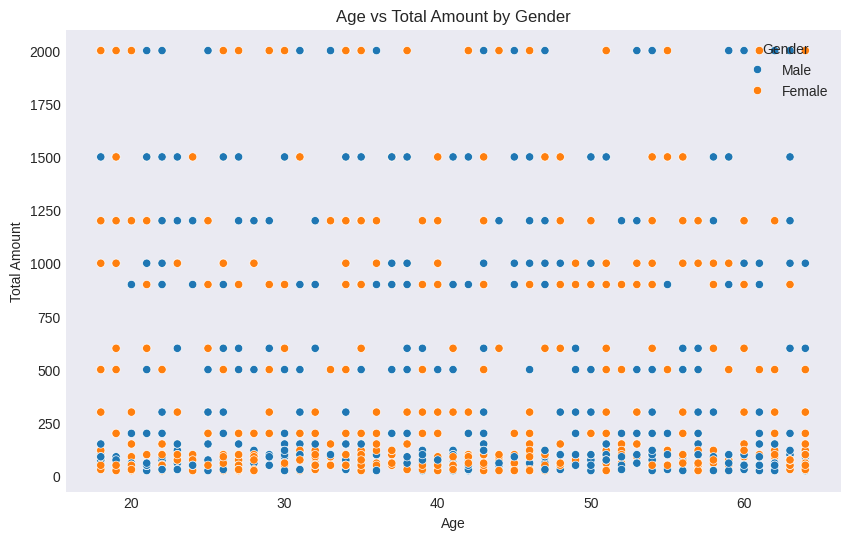

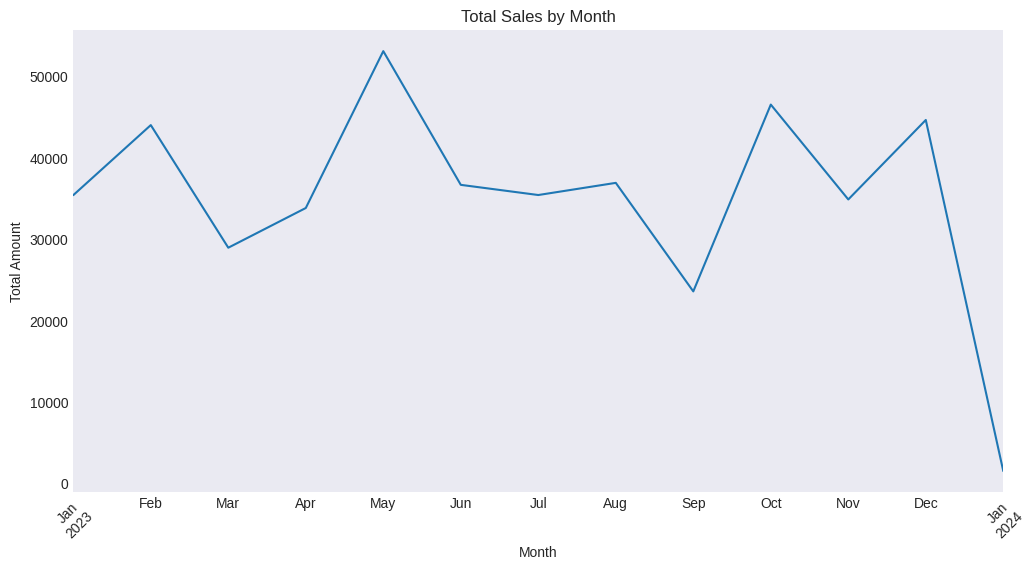

In [7]:
# 1. Distribution of Total Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Amount'], bins=20, kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

# 2. Sales by Product Category
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', data=df)
plt.title('Sales Count by Product Category')
plt.xticks(rotation=45)
plt.show()

# 3. Age vs Total Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Amount', hue='Gender', data=df)
plt.title('Age vs Total Amount by Gender')
plt.show()

# 4. Sales over time (monthly)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

## Preprocessing

### Handle missing values

In [8]:
df.fillna(df.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)  # Numeric columns
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)  # Categorical columns

### Encode categorical variables

In [9]:
le_gender = LabelEncoder()
le_category = LabelEncoder()
df['Gender_Encoded'] = le_gender.fit_transform(df['Gender'])
df['Product_Category_Encoded'] = le_category.fit_transform(df['Product Category'])

### Feature engineering

In [10]:
# 1. Extract year and month from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# 2. Create interaction feature: Quantity * Price per Unit (should match Total Amount, for validation)
df['Qty_Price_Interaction'] = df['Quantity'] * df['Price per Unit']

# 3. Customer purchase frequency (count transactions per Customer ID)
df['Customer_Purchase_Count'] = df.groupby('Customer ID')['Customer ID'].transform('count')

### Feature Scaling

In [11]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Qty_Price_Interaction', 'Customer_Purchase_Count']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Drop unnecessary columns (e.g., IDs, original categorical columns, temporary Month column)
df_processed = df.drop(['Transaction ID', 'Customer ID', 'Gender', 'Product Category', 'Date', 'Month'], axis=1)

### Display processed data

In [12]:
print("\nProcessed Data (First 5 Rows):")
print(df_processed.head())


Processed Data (First 5 Rows):
        Age  Quantity  Price per Unit  Total Amount  Gender_Encoded  \
0 -0.540565  0.429265       -0.685123     -0.546704               1   
1 -1.125592 -0.453996        1.688464      0.971919               0   
2  0.629489 -1.337258       -0.790615     -0.761098               1   
3 -0.321180 -1.337258        1.688464      0.078611               1   
4 -0.833078 -0.453996       -0.685123     -0.636035               1   

   Product_Category_Encoded  Year  Qty_Price_Interaction  \
0                         0  2023              -0.546704   
1                         1  2023               0.971919   
2                         2  2023              -0.761098   
3                         1  2023               0.078611   
4                         0  2023              -0.636035   

   Customer_Purchase_Count  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  


## Save Preprocessed Data

In [13]:
output_path = '../Data/retail_sales_dataset_preprocessed.csv'
df_processed.to_csv(output_path, index=False)
print(f"Preprocessed data saved to: {output_path}")

# Verify file exists
if os.path.exists(output_path):
    print(f"File successfully created at: {output_path}")
else:
    print("Error: File not saved.")

Preprocessed data saved to: ../Data/retail_sales_dataset_preprocessed.csv
File successfully created at: ../Data/retail_sales_dataset_preprocessed.csv
